<a href="https://colab.research.google.com/github/khanhne28/BT_AI/blob/main/Final_project/Traning_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten,  LeakyReLU
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tạo bộ dữ liệu training set
training_set=train.flow_from_directory('/content/drive/MyDrive/Final AI/Data/Train',
                                               target_size=(100,100), batch_size=32, class_mode='categorical')


Found 642 images belonging to 61 classes.


In [ ]:
training_set.class_indices

{'CamDiBo': 0,
 'CamDung-DoXe': 1,
 'CamNguocChieu': 2,
 'CamOto-OtoKhach': 3,
 'CamQuayDau': 4,
 'CamRePhai': 5,
 'CamReTrai': 6,
 'CamXeDap': 7,
 'CamXeMay': 8,
 'CamXeTai': 9,
 'ChayTheoVongXuyen': 10,
 'ChiDuocDiThangVaRePhai': 11,
 'ChiDuocDiThangVaReTrai': 12,
 'ChiDuocRePhai': 13,
 'ChiDuocReTrai': 14,
 'ChoNgoatNguyHiem': 15,
 'CongTruong': 16,
 'DanhChoNguoiDiBo': 17,
 'DocNguyHiem': 18,
 'DungLai': 19,
 'Duong2Chieu': 20,
 'DuongBiThuHep': 21,
 'DuongCam': 22,
 'DuongCaoTocPhiaTruoc': 23,
 'DuongCoCapDien': 24,
 'DuongCoTreEm': 25,
 'DuongDaLo': 26,
 'DuongDanhChoOto': 27,
 'DuongDanhChoOto-XeMay': 28,
 'DuongDanhChoXeMay': 29,
 'DuongDanhChoXeThoSo': 30,
 'DuongDoi': 31,
 'DuongGiaoNhauCungCap': 32,
 'DuongHam': 33,
 'DuongHayXayRaTaiNan': 34,
 'DuongNguoiDiBoCatNgang': 35,
 'DuongTronTruot': 36,
 'DuongXeDapCatNgang': 37,
 'GiaoDuongSatCoRao': 38,
 'GiaoDuongSatKhongRao': 39,
 'GiaoNhauCoTinHieuDen': 40,
 'GiaoNhauDuongKhongUuTien': 41,
 'GiaoNhauDuongUuTien': 42,
 'HanCheC

In [ ]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same',input_shape=(100,100,3))) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))


model.add(Conv2D(64,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Flatten())
model.add(Dense(256,activation='linear',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(61,activation='softmax'))

# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 50, 50, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                    

In [ ]:
history=model.fit(training_set,epochs=50,batch_size=128,verbose=1)

Epoch 1/50
21/21 [==============================] - 202s 9s/step - loss: 5.3204 - accuracy: 0.0561
Epoch 2/50
21/21 [==============================] - 4s 163ms/step - loss: 3.7313 - accuracy: 0.0966
Epoch 3/50
21/21 [==============================] - 4s 187ms/step - loss: 3.2543 - accuracy: 0.1495
Epoch 4/50
21/21 [==============================] - 4s 182ms/step - loss: 2.7309 - accuracy: 0.2741
Epoch 5/50
21/21 [==============================] - 4s 175ms/step - loss: 2.3437 - accuracy: 0.3598
Epoch 6/50
21/21 [==============================] - 4s 182ms/step - loss: 1.9716 - accuracy: 0.4424
Epoch 7/50
21/21 [==============================] - 4s 198ms/step - loss: 1.6198 - accuracy: 0.5280
Epoch 8/50
21/21 [==============================] - 4s 173ms/step - loss: 1.3102 - accuracy: 0.6231
Epoch 9/50
21/21 [==============================] - 4s 175ms/step - loss: 1.1919 - accuracy: 0.6417
Epoch 10/50
21/21 [==============================] - 4s 191ms/step - loss: 1.0216 - accuracy: 0.7040


In [ ]:
model.save('/content/drive/MyDrive/Final AI/TrafficSign.h5')

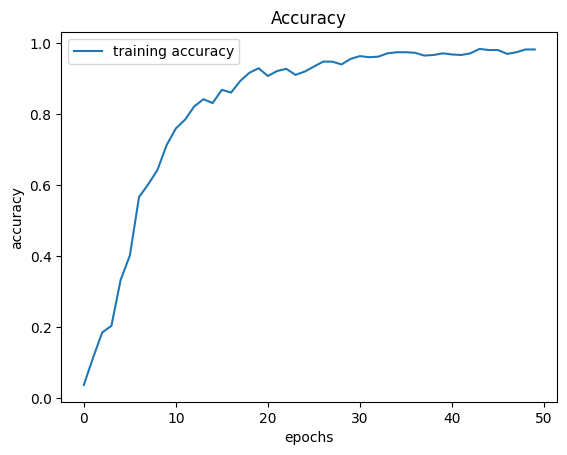

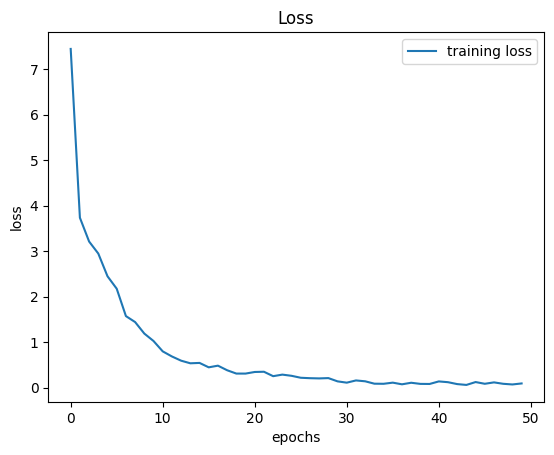

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()